In [1]:
install.packages('randomForest')

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lahlo\AppData\Local\Temp\RtmpwdVb2V\downloaded_packages


In [4]:
library('randomForest')


ERROR: Error in library("xlsx"): aucun package nommé 'xlsx' n'est trouvé


In [6]:
install.packages('xlsx')
library('xlsx')

package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lahlo\AppData\Local\Temp\RtmpwdVb2V\downloaded_packages


Warning message:
"le package 'xlsx' a été compilé avec la version R 4.1.3"


In [37]:
tabfinal <- read.xlsx('/Users/lahlo/Documents/TableauIndicateur.xlsx',1)
tabfinal <- tabfinal[2:11]
summary(tabfinal)


   tabdensity        moyenne      tabtransitivity   tabdiameter   
 Min.   :0.5199   Min.   :31.79   Min.   :0.7694   Min.   :2.000  
 1st Qu.:0.6712   1st Qu.:37.21   1st Qu.:0.8507   1st Qu.:2.000  
 Median :0.7227   Median :39.42   Median :0.8733   Median :3.000  
 Mean   :0.7214   Mean   :39.33   Mean   :0.8707   Mean   :2.597  
 3rd Qu.:0.7755   3rd Qu.:41.45   3rd Qu.:0.8989   3rd Qu.:3.000  
 Max.   :0.8933   Max.   :49.68   Max.   :0.9634   Max.   :4.000  
    nbpoints      medianedegree   ecartypedegree    medianebetw     
 Min.   : 20.00   Min.   :36.50   Min.   : 8.599   Min.   : 0.7029  
 1st Qu.: 41.00   1st Qu.:41.75   1st Qu.:10.812   1st Qu.: 3.5065  
 Median : 49.00   Median :43.25   Median :12.489   Median : 5.1408  
 Mean   : 51.82   Mean   :43.49   Mean   :12.640   Mean   : 4.9638  
 3rd Qu.: 58.00   3rd Qu.:45.50   3rd Qu.:14.181   3rd Qu.: 6.1164  
 Max.   :100.00   Max.   :50.00   Max.   :17.846   Max.   :10.6635  
  ecartypebetw      betweeness    
 Min.   : 2.4

In [45]:
#tabfinal[1]

In [40]:
tab_RandomForest <- randomForest(nbpoints~.,data=tabfinal, ntree = 500, na.action = na.omit)
print(tab_RandomForest)


Call:
 randomForest(formula = nbpoints ~ ., data = tabfinal, ntree = 500,      na.action = na.omit) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 364.1615
                    % Var explained: -23.71


In [41]:
tab_RandomForest$oob.time

[1] 187 178 191 189 193 173 172 166 184 189 161 171 185 190 185 181 201 188 196
[20] 195 193 170 178 185 196 197 177 187 200 205 169 179 179 199 199 176 178 177
[39] 184 180 175 173 162 181 184 193 182 188 189 171 177 198 210 204 157 188 171
[58] 175 183 171 174 177 198 184 187 179 175 168 199 177 170 178

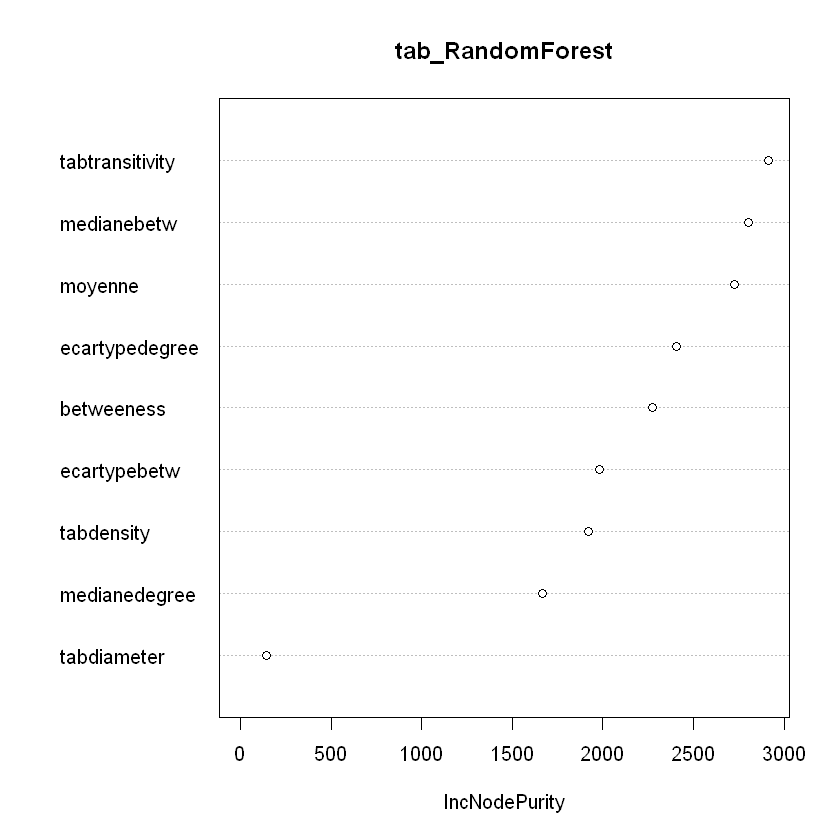

In [42]:
varImpPlot(tab_RandomForest)

In [57]:
#library(randomForest)
#library(ggplot2)

set.seed(4543)
#data(mtcars)
rf.fit <- randomForest(nbpoints ~ ., data=tabfinal, ntree=1000, mtry=3,
                       keep.forest=FALSE, importance=TRUE)
rf.fit


Call:
 randomForest(formula = nbpoints ~ ., data = tabfinal, ntree = 1000,      mtry = 3, keep.forest = FALSE, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 3

          Mean of squared residuals: 359.2728
                    % Var explained: -22.05

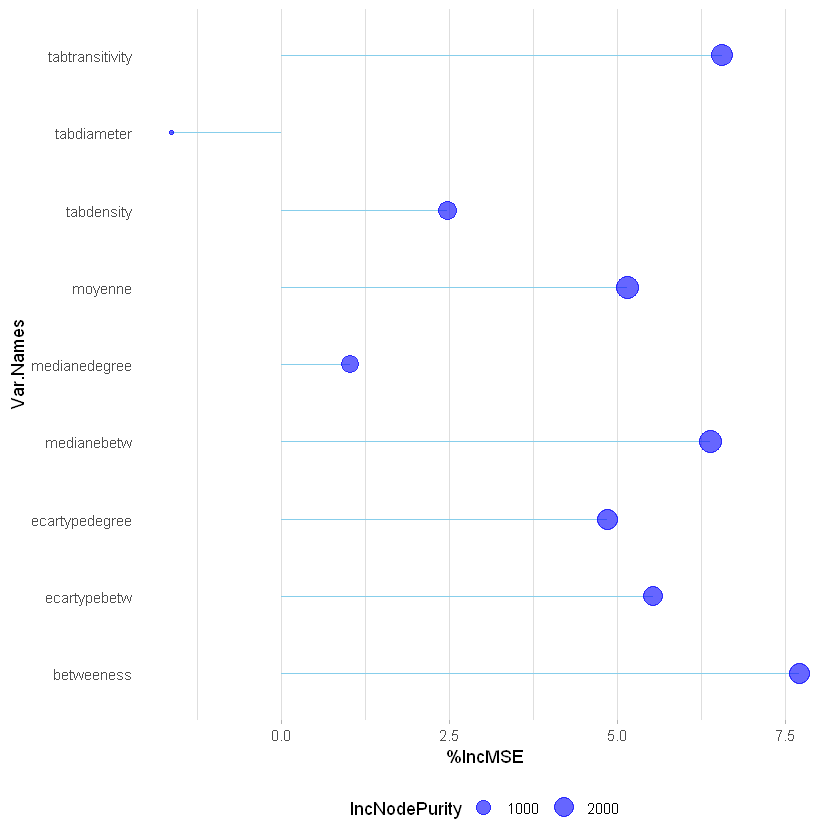

In [58]:
### Visualize variable importance ----------------------------------------------

# Get variable importance from the model fit
ImpData <- as.data.frame(importance(rf.fit))
ImpData$Var.Names <- row.names(ImpData)

ggplot(ImpData, aes(x=Var.Names, y=`%IncMSE`)) +
  geom_segment( aes(x=Var.Names, xend=Var.Names, y=0, yend=`%IncMSE`), color="skyblue") +
  geom_point(aes(size = IncNodePurity), color="blue", alpha=0.6) +
  theme_light() +
  coord_flip() +
  theme(
    legend.position="bottom",
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  )